In [23]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


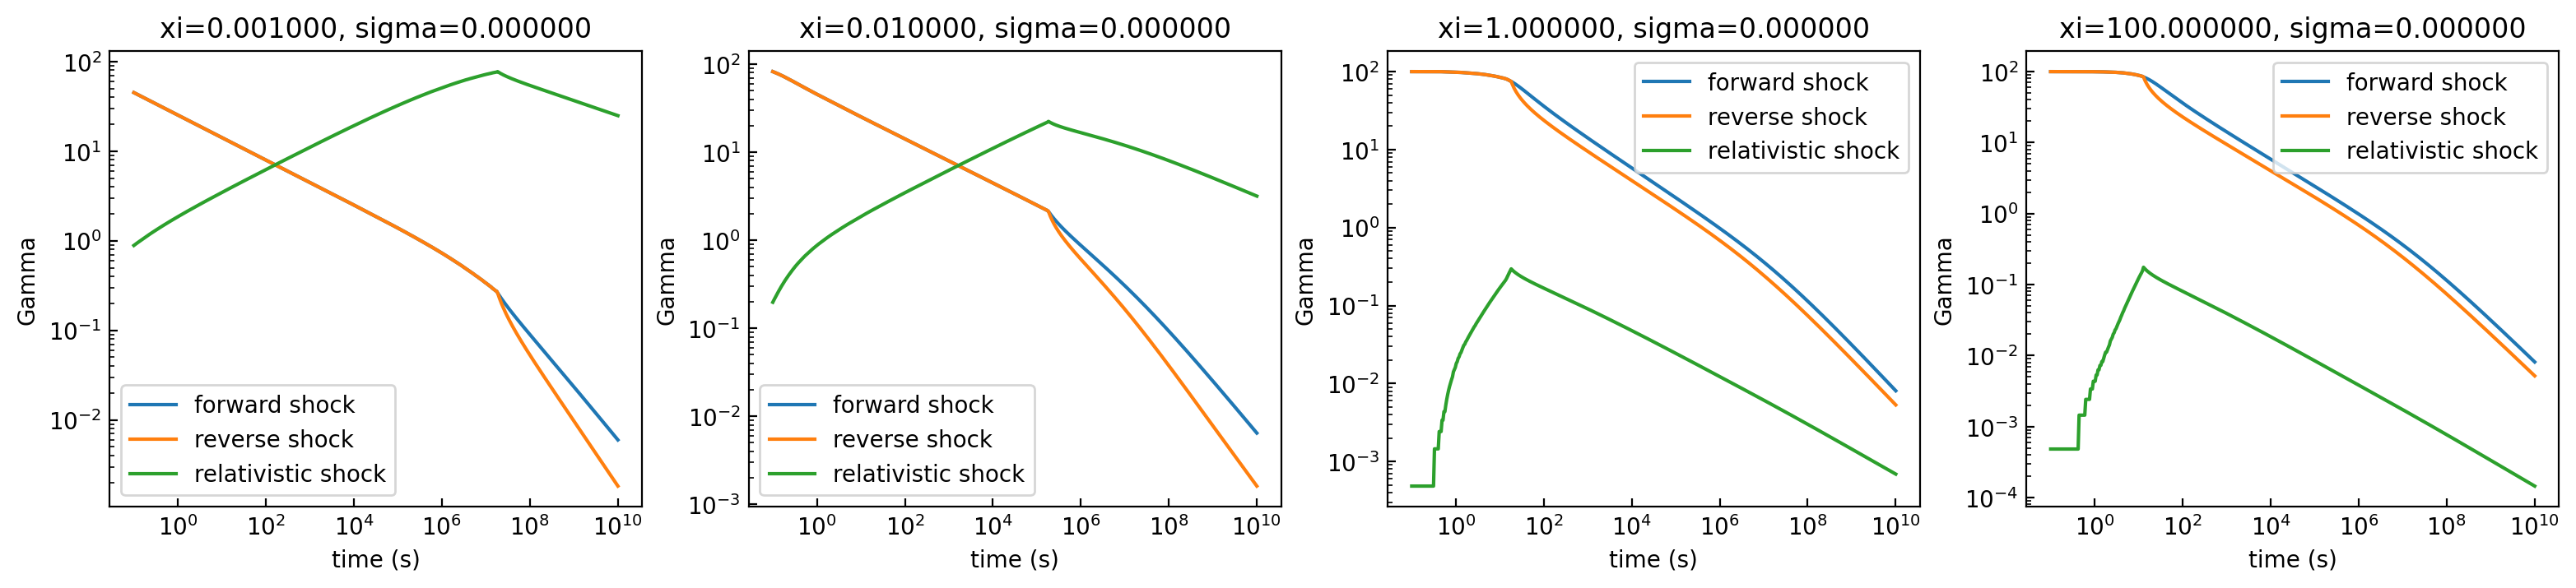

In [22]:
def draw_reverse_shock_state(xis,sigma):
    
    fig = plt.figure(figsize=(4.8*len(xis), 3.6))

    axs = [fig.add_subplot(1,len(xis),i+1) for i in range(len(xis))]
    
    for i,xi in enumerate(xis):
        coord = np.load('rshock-data/coord{:.6f}-{:.6f}.npz'.format(xi, sigma))
        f_shock = np.load('rshock-data/f_shock{:.6f}-{:.6f}.npz'.format(xi, sigma))
        r_shock = np.load('rshock-data/r_shock{:.6f}-{:.6f}.npz'.format(xi, sigma))
        t = coord['t_src'][0,0,:]
        g_f = f_shock['Gamma'][0,0,:]
        g_r = r_shock['Gamma'][0,0,:]
        g_rel = r_shock['Gamma_rel'][0,0,:]

        u_f = np.sqrt(g_f**2 - 1)
        u_r = np.sqrt(g_r**2 - 1)
        u_rel = np.sqrt(g_rel**2 - 1)

        axs[i].plot(t, u_f,label='forward shock')
        axs[i].plot(t, u_r,label='reverse shock')
        axs[i].plot(t, u_rel,label='relativistic shock')
        axs[i].legend()

    for i,xi in enumerate(xis):
        axs[i].set_xscale('log')
        axs[i].set_yscale('log')
        axs[i].set_xlabel('time (s)')
        axs[i].set_ylabel('Gamma')
        axs[i].set_title('xi={:.6f}, sigma={:.6f}'.format(xi, sigma))

draw_reverse_shock_state([0.001,0.01,1,100],0)

KeysView(NpzFile 'spreading-data/shock.npz' with keys: Gamma, Gamma_rel, B, t_com, r...)


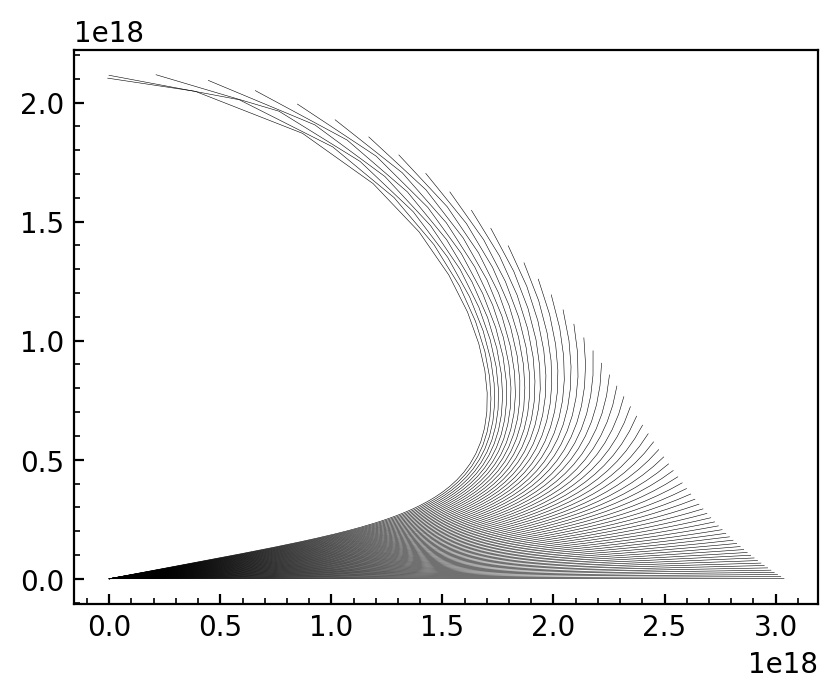

In [49]:
def draw_spreading():
    shock = np.load('spreading-data/shock.npz')
    print(shock.keys())
    t = shock['t_com']
    g = shock['Gamma']
    theta = shock['theta']
    r = shock['r']
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    fig = plt.figure(figsize=(4.8, 3.6))
    ax = fig.add_subplot(1,1,1)

    for i in range(t.shape[1]):
        ax.plot(x[0,i,:], y[0,i,:],c='k',ls='-',lw=0.2)
    
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    plt.show()

draw_spreading()

KeysView(NpzFile 'spreading-data/shock.npz' with keys: Gamma, Gamma_rel, B, t_com, r...)


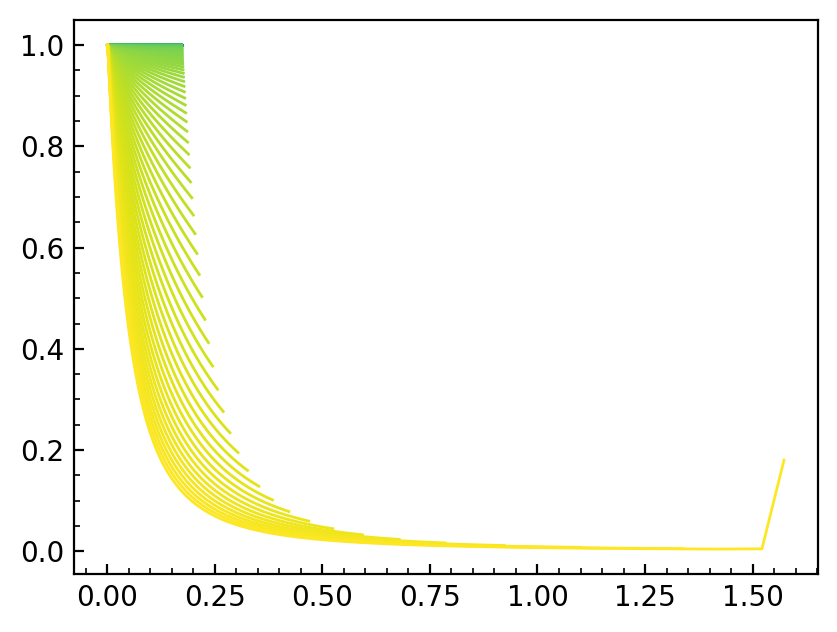

In [48]:
def draw_spreading():
    shock = np.load('spreading-data/shock.npz')
    print(shock.keys())
    t = shock['t_com']
    g = shock['Gamma']
    theta = shock['theta']
    r = shock['r']
    
    cos_theta = np.cos(theta)
    dcos = np.abs(cos_theta[0,1::,:] - cos_theta[0,0:-1,:])
    theta_x = 0.5*(theta[0,0:-1,:] + theta[0,1::,:])

    fig = plt.figure(figsize=(4.8, 3.6))
    ax = fig.add_subplot(1,1,1)
    colors = plt.cm.viridis(np.linspace(0, 1, t.shape[2]))
    for i in range(t.shape[2]):
        dedo =dcos[:,0]/dcos[:,i]
        dedo = dedo/dedo.max()
        ax.plot(theta_x[:,i], dedo,ls='-',lw=1,color=colors[i])
    
    #ax.set_yscale('log')
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    plt.show()

draw_spreading()